In [1]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
zoo = pd.read_csv('zoo.data')

In [3]:
zoo.columns = [
    "animal name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type"
]

In [4]:
zoo = zoo.iloc[:,1:]

In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
hair        100 non-null int64
feathers    100 non-null int64
eggs        100 non-null int64
milk        100 non-null int64
airborne    100 non-null int64
aquatic     100 non-null int64
predator    100 non-null int64
toothed     100 non-null int64
backbone    100 non-null int64
breathes    100 non-null int64
venomous    100 non-null int64
fins        100 non-null int64
legs        100 non-null int64
tail        100 non-null int64
domestic    100 non-null int64
catsize     100 non-null int64
type        100 non-null int64
dtypes: int64(17)
memory usage: 13.4 KB


In [6]:
#zoo.to_csv('zoo.csv',index=False)

In [7]:
zoo = zoo.astype({"hair":'category', "feathers": 'category', "eggs": 'category', "milk": 'category', "airborne": 'category',"aquatic":'category',"predator":'category',"toothed":'category',"backbone":'category', "breathes":'category',"venomous":'category',"fins":'category',"legs":'category',"tail":'category',"domestic":'category',"catsize":'category',"type":'category'})

In [8]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
hair        100 non-null category
feathers    100 non-null category
eggs        100 non-null category
milk        100 non-null category
airborne    100 non-null category
aquatic     100 non-null category
predator    100 non-null category
toothed     100 non-null category
backbone    100 non-null category
breathes    100 non-null category
venomous    100 non-null category
fins        100 non-null category
legs        100 non-null category
tail        100 non-null category
domestic    100 non-null category
catsize     100 non-null category
type        100 non-null category
dtypes: category(17)
memory usage: 3.8 KB


In [9]:
hair = pd.DataFrame(zoo['hair'])
feathers = pd.DataFrame(zoo['feathers'])
eggs = pd.DataFrame(zoo['eggs'])
milk = pd.DataFrame(zoo['milk'])
airborne = pd.DataFrame(zoo['airborne'])
aquatic = pd.DataFrame(zoo['aquatic'])
predator = pd.DataFrame(zoo['predator'])
toothed = pd.DataFrame(zoo['toothed'])
backbone = pd.DataFrame(zoo['backbone'])
breathes = pd.DataFrame(zoo['breathes'])
venomous = pd.DataFrame(zoo['venomous'])
fins = pd.DataFrame(zoo['fins'])
legs = pd.DataFrame(zoo['legs'])
tail = pd.DataFrame(zoo['tail'])
domestic = pd.DataFrame(zoo['domestic'])
catsize = pd.DataFrame(zoo['catsize'])
type_ = pd.DataFrame(zoo['type'])

# Uni Variate Decision tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, type_, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [11]:
score = [acc_score(hair), acc_score(feathers), acc_score(eggs), acc_score(milk), acc_score(airborne), 
         acc_score(aquatic), acc_score(predator), acc_score(toothed), acc_score(backbone), acc_score(breathes),
        acc_score(venomous), acc_score(fins), acc_score(legs),
        acc_score(tail), acc_score(domestic), acc_score(catsize)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['hair', 'feathers', 'eggs', 'milk',
                               'airborne', 'aquatic', 'predator', 'toothed',
                              'backbone', 'breathes', 'venomous',
                              'fins','legs','tail',
                              'domestic','catsize'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
predator,0.32
domestic,0.32
airborne,0.40
aquatic,0.40
catsize,0.44
backbone,0.52
venomous,0.52
breathes,0.56
fins,0.56
tail,0.56


# Multivariate Decision tree

In [12]:
# Concat all the individual factors
factors2 = pd.concat([hair, feathers,eggs, milk,
                    airborne, aquatic, predator, toothed,
                    backbone, breathes, venomous,
                    fins,legs,tail,
                    domestic,catsize], sort = False, axis = 1)
factors2.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [13]:
y = type_
X = pd.DataFrame(factors2)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [14]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (75, 1) (75, 16)
Test Set  : (25, 1) (25, 16)


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.92

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.68



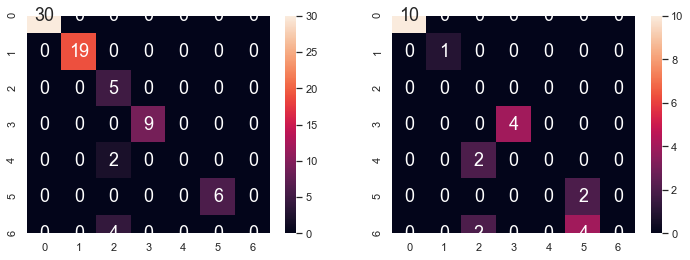

In [16]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest

In [17]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 bootstrap = True,
                                max_features = 'sqrt') 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.96



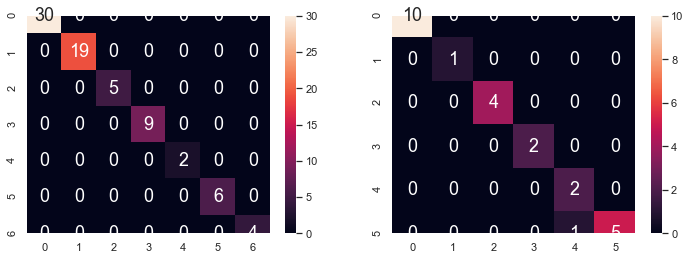

In [18]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression

In [19]:
# Import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
# Fit Logistic Regression on Train Data 
LR.fit(X_train,y_train.values.ravel())

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9733333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8399999999999999



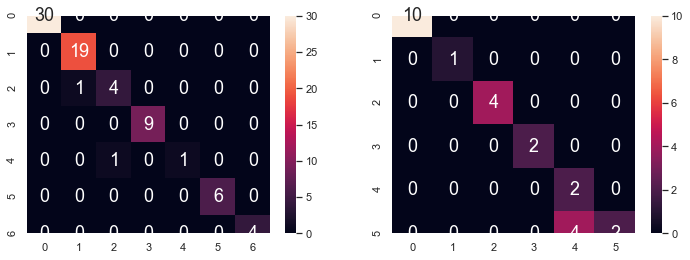

In [20]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average= 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average= 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K Nearest Neighbours

In [21]:
# Import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=8) # k = squareroot N, where N is the number of training data (sqrt(0.75x100))
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8266666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.64



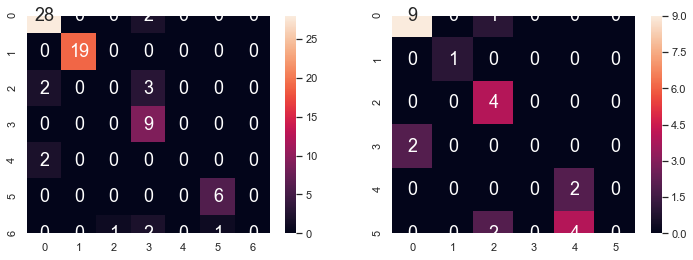

In [22]:
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting

In [23]:
# Import GradientBoostingClassifier model from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   

# Fit Gradient Boosting model on Train Data
gradboost.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.8399999999999999



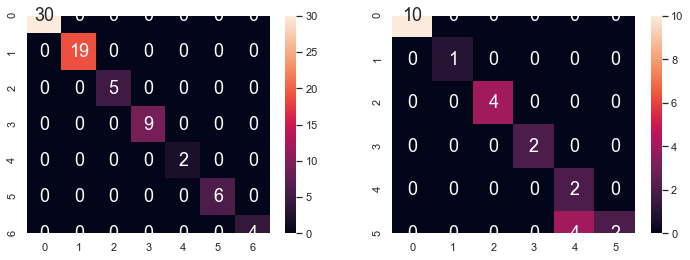

In [24]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = gradboost.predict(X_train)
y_test_pred = gradboost.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Support Vector Machine

In [25]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set

In [26]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [27]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.92
Accuracy Polynomial Kernel: 0.8
Accuracy Radial Basis Kernel: 0.68
Accuracy Sigmoid Kernel: 0.56


# Neural Network

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.88


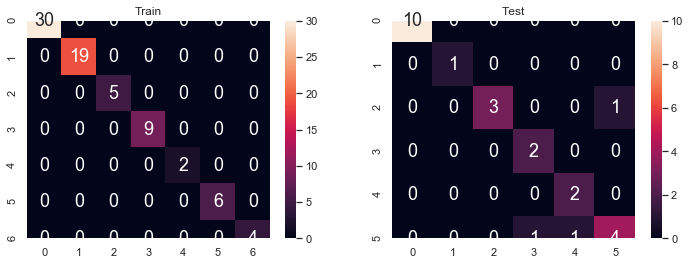

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=600)
mlp.fit(X_train,y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_test, y_test))

# XG Boost

In [29]:
zoo = zoo.astype({"hair":'bool',"feathers":'bool',"eggs":'bool',"milk":'bool',"airborne":'bool',"aquatic":'bool',"predator":'bool',"toothed":'bool',"backbone":'bool',"breathes":'bool',"venomous":'bool',"fins":'bool',"legs":'int64',"tail":'bool',"domestic":'bool',"catsize":'bool'})

In [30]:
# Import XGBClassifier model from Scikit-Learn
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100,     # n_estimators denote number of trees
                    max_depth = 2,          # Set the maximum depth of each tree
                    gamma=0,                # Regularization parameter: min loss reduction required to make a further partition on a leaf node of the tree
                    learning_rate = 0.1,  # Learning_rate shrinks the contribution of each tree   
                    colsample_bytree = 0.3) # Subsample ratio by number of columns when constructing each tree

# Fit XGBoost on Train Data 
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.96



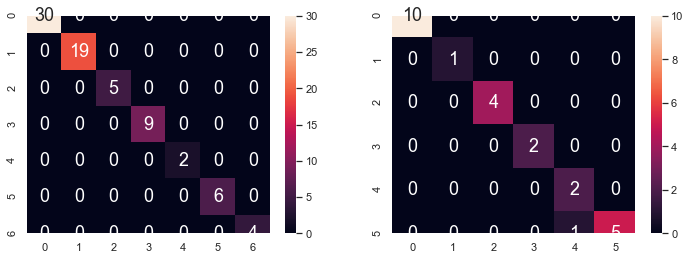

In [31]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred,average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred,average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])